In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
yf.pdr_override()

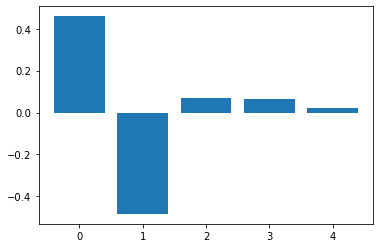

AAPL :  model_score:  0.8144329896907216  f1_score:  0.7906976744186047  accuary_score:  0.8144329896907216

GOOG :  model_score:  0.8144329896907216  f1_score:  0.7857142857142858  accuary_score:  0.8144329896907216

AMZN :  model_score:  0.7628865979381443  f1_score:  0.7294117647058823  accuary_score:  0.7628865979381443

TSLA :  model_score:  0.865979381443299  f1_score:  0.8311688311688312  accuary_score:  0.865979381443299

BABA :  model_score:  0.7216494845360825  f1_score:  0.689655172413793  accuary_score:  0.7216494845360825

PTPI :  model_score:  0.7835051546391752  f1_score:  0.676923076923077  accuary_score:  0.7835051546391752

BTCY :  model_score:  0.845360824742268  f1_score:  0.8148148148148148  accuary_score:  0.845360824742268

FOX :  model_score:  0.8556701030927835  f1_score:  0.8444444444444444  accuary_score:  0.8556701030927835

NVDA :  model_score:  0.8247422680412371  f1_score:  0.8247422680412373  accuary_score:  0.8247422680412371

DIS :  model_score:  0.886

In [2]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK","6133.hk",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
end="2022-12-31"

for i in stock_name:
    #MACD619RSI21_8020
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    #指标运算
    stock_data=MACD_short(stock_data)
    stock_data=RSI(stock_data)
    stock_data=RSI_MACD(stock_data,21,80,20)
    stock_data= my_rsi(stock_data, 21)
    stock_data = stock_data.dropna()
    
#    lr = LogisticRegression()
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.01
    #logistic regression
    lr = LogisticRegression(penalty =penalty, C=C) 
    
    X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]].values
    #X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21","Open","High","Low","Close"]].values
    #X = stock_data.loc[:,["Open","High","Low","Close"]].values
    

    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  

    #Y = stock_data.loc[:,["up_or_down"]].values.ravel()
    Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

    split = int(0.8*len(stock_data))
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    lr.fit(X_train, Y_train)
    y_pred = lr.predict(X_test)
    f1_score(y_pred, Y_test)
    
    importance = lr.coef_[0]


    # plot feature importance
    #plt.bar([x for x in range(len(importance))], importance)
    if i=="AAPL":
        plt.bar(range(len(importance)), importance)
        plt.xticks(range(len(importance)), range(len(importance)))
        plt.show()
    
    
    print(i,": ","model_score: ",lr.score(X_test,Y_test)," f1_score: ",f1_score(y_pred, Y_test)," accuary_score: ",accuracy_score(Y_test,y_pred))
    print()

In [3]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK","6133.hk",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
end="2022-12-31"

for i in stock_name:
    #MACD619RSI21_8020
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    #指标运算
    stock_data=MACD_short(stock_data)
    stock_data=RSI(stock_data)
    stock_data=RSI_MACD(stock_data,21,80,20)
    stock_data= my_rsi(stock_data, 21)
    stock_data = stock_data.dropna()
    
    #lr = LogisticRegression()
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.01
    #logistic regression
    lr = LogisticRegression(penalty =penalty, C=C) 
    
    X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]].values
    #X = stock_data.loc[:,["re_close","re_open"]].values
    

    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  

    #Y = stock_data.loc[:,["up_or_down"]].values.ravel()
    Y = stock_data.loc[:,["up_or_down"]].values
    #Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

    split = int(0.8*len(stock_data))
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    lr.fit(X_train, Y_train)
    y_pred = lr.predict(X_test)
    f1_score(y_pred, Y_test)
    
    
    print(i,": ","model_score: ",lr.score(X_test,Y_test)," f1_score: ",f1_score(y_pred, Y_test)," accuary_score: ",accuracy_score(Y_test,y_pred))
    print()

/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AAPL :  model_score:  0.6288659793814433  f1_score:  0.5384615384615384  accuary_score:  0.6288659793814433

GOOG :  model_score:  0.5876288659793815  f1_score:  0.5  accuary_score:  0.5876288659793815



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AMZN :  model_score:  0.5773195876288659  f1_score:  0.5060240963855421  accuary_score:  0.5773195876288659



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TSLA :  model_score:  0.7216494845360825  f1_score:  0.5714285714285714  accuary_score:  0.7216494845360825

BABA :  model_score:  0.6185567010309279  f1_score:  0.49315068493150693  accuary_score:  0.6185567010309279



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PTPI :  model_score:  0.6597938144329897  f1_score:  0.23255813953488372  accuary_score:  0.6597938144329897

BTCY :  model_score:  0.6082474226804123  f1_score:  0.4242424242424242  accuary_score:  0.6082474226804123



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FOX :  model_score:  0.6494845360824743  f1_score:  0.5750000000000001  accuary_score:  0.6494845360824743

NVDA :  model_score:  0.6391752577319587  f1_score:  0.6534653465346534  accuary_score:  0.6391752577319587



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DIS :  model_score:  0.6391752577319587  f1_score:  0.47761194029850756  accuary_score:  0.6391752577319587



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NKE :  model_score:  0.6288659793814433  f1_score:  0.6603773584905661  accuary_score:  0.6288659793814433



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XOM :  model_score:  0.6185567010309279  f1_score:  0.6782608695652174  accuary_score:  0.6185567010309279



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KO :  model_score:  0.6185567010309279  f1_score:  0.6476190476190476  accuary_score:  0.6185567010309279



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2319.HK :  model_score:  0.6808510638297872  f1_score:  0.6052631578947368  accuary_score:  0.6808510638297872

0700.HK :  model_score:  0.6382978723404256  f1_score:  0.5526315789473685  accuary_score:  0.6382978723404256



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1211.HK :  model_score:  0.6276595744680851  f1_score:  0.4444444444444445  accuary_score:  0.6276595744680851

6133.hk :  model_score:  0.8235294117647058  f1_score:  0.0  accuary_score:  0.8235294117647058



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2318.HK :  model_score:  0.6276595744680851  f1_score:  0.44444444444444436  accuary_score:  0.6276595744680851

1448.HK :  model_score:  0.5957446808510638  f1_score:  0.5365853658536585  accuary_score:  0.5957446808510638



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1810.HK :  model_score:  0.6595744680851063  f1_score:  0.5  accuary_score:  0.6595744680851063

3690.HK :  model_score:  0.6276595744680851  f1_score:  0.5882352941176471  accuary_score:  0.6276595744680851

2018.HK :  model_score:  0.5531914893617021  f1_score:  0.34375  accuary_score:  0.5531914893617021



/Users/liangfanxiao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
